In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

In [17]:
df=pd.read_csv("employee_attrition_data.csv")
df.drop("EmpID",axis=1,inplace=True)
df

,Age,Experience,Salary,WorkHoursPerWeek,SatisfactionLevel,Attrition
0,50,25,54856,54,0.12,0
1,36,3,34200,55,0.15,1
2,29,18,89178,46,0.17,0
3,42,19,58997,53,0.64,0
4,40,32,50611,48,0.74,0
...,...,...,...,...,...,...
795,32,28,130432,44,0.86,0
796,29,0,102425,48,0.04,0
797,47,34,117949,52,0.79,0
798,26,5,102811,53,0.41,0


In [18]:
x=df.drop("Attrition",axis=1)
y=df["Attrition"]

In [19]:
scalar=StandardScaler()
x_scalar=scalar.fit_transform(x)
x_scalar

array([[ 0.81451899,  0.75161104, -0.92894027,  0.90907745, -1.34921953],
       [-0.44498849, -1.40776773, -1.50553449,  1.04705164, -1.24555303],
       [-1.07474224,  0.06453598,  0.02912843, -0.19471608, -1.17644203],
       ...,
       [ 0.54462453,  1.63499327,  0.8322458 ,  0.63312907,  0.96599903],
       [-1.3446367 , -1.21146057,  0.40968173,  0.77110326, -0.34711001],
       [-1.25467188, -1.30961415, -1.6936478 ,  1.18502583,  1.24244303]],
      shape=(800, 5))

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x_scalar,y,test_size=0.2,random_state=42)

In [21]:
model=KNeighborsClassifier(n_neighbors=8)
model.fit(x_train,y_train)

,n_neighbors,8
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [22]:
y_pred=model.predict(x_test)
y_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1])

In [23]:
accuracy=accuracy_score(y_pred,y_test)
accuracy

0.93125

In [24]:
cm=confusion_matrix(y_pred,y_test)
cm

array([[140,   9],
       [  2,   9]])

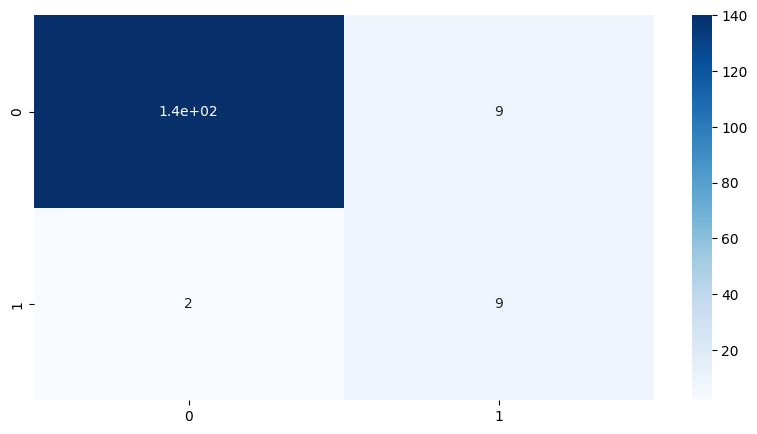

In [25]:
plt.figure(figsize=(10,5))
sns.heatmap(cm,annot=True,cmap="Blues")
plt.show()